<a href="https://colab.research.google.com/github/sancarhacer/MachineLearning/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [30]:
df = pd.read_csv('multiplegradesdataset.csv')
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


### Basic Data Info

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [32]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


### Exploratory Data Analysis (EDA)

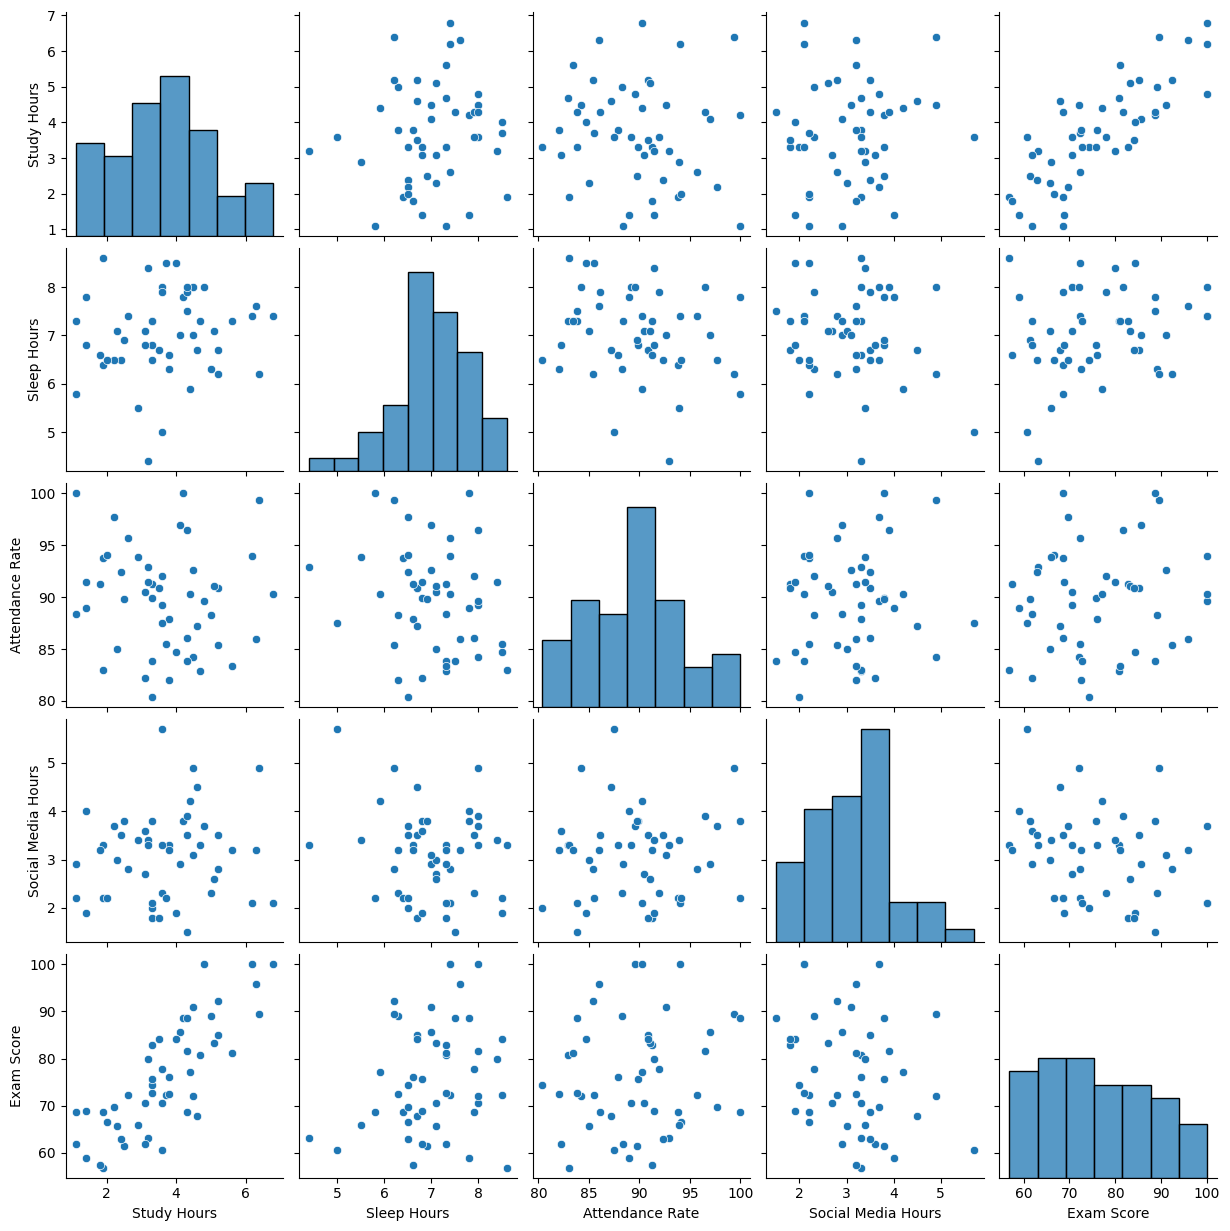

In [33]:
sns.pairplot(df)
plt.show()

In [34]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


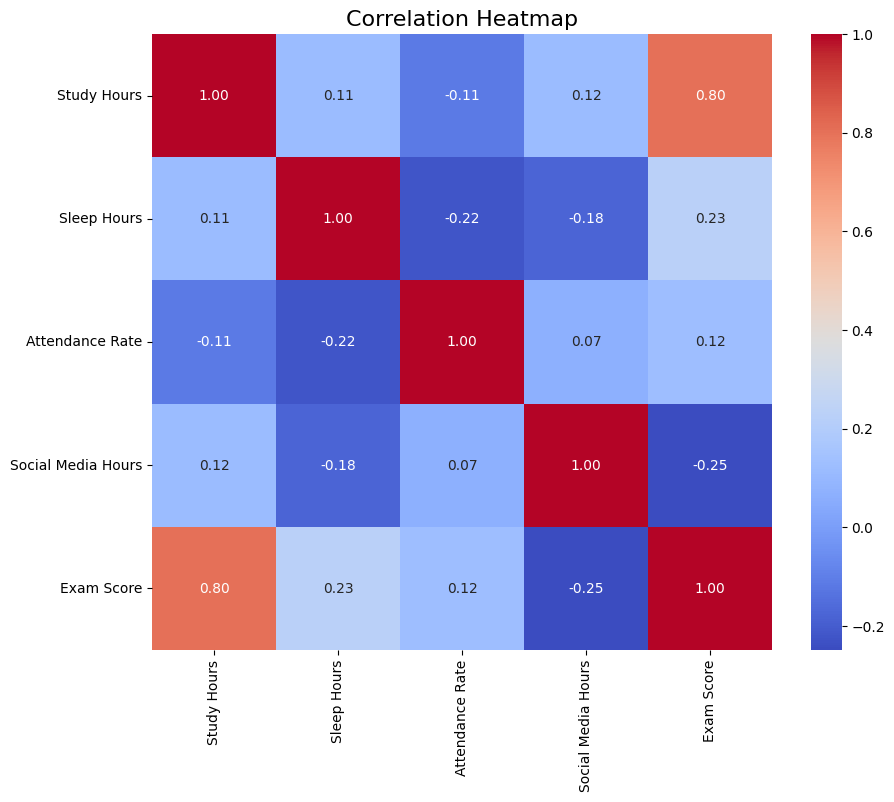

In [35]:
# annot=True  -> writes the correlation values inside each cell
# cmap="coolwarm" -> sets the color scale (you can also use "viridis", "plasma", etc.)
# fmt=".2f" -> formats the numbers to 2 decimal places
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

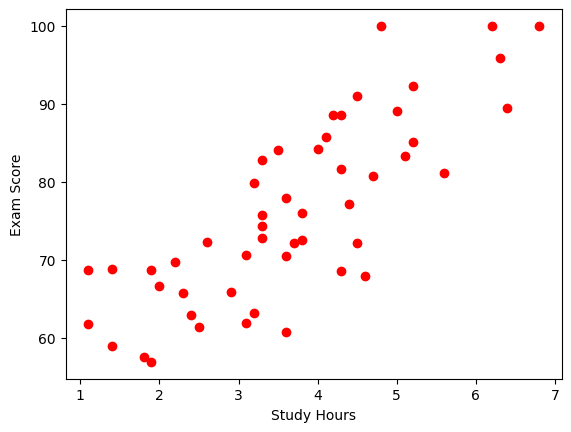

In [36]:
plt.scatter(df['Study Hours'],df['Exam Score'],color='r')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

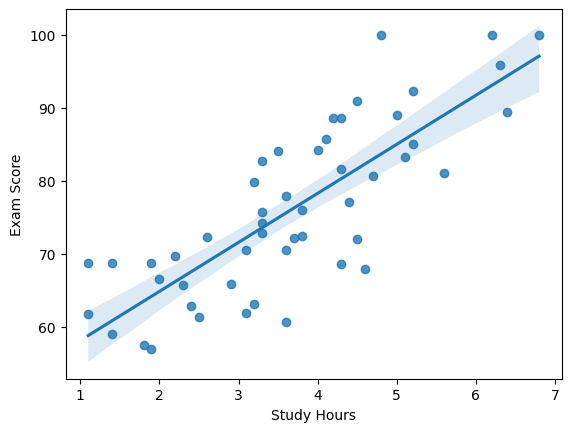

In [37]:
sns.regplot(x=df['Study Hours'],y=df['Exam Score'])
plt.show()

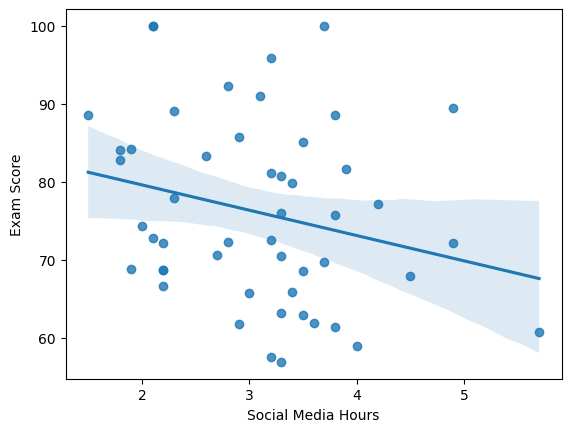

In [38]:
sns.regplot(x=df['Social Media Hours'],y=df['Exam Score'])
plt.show()

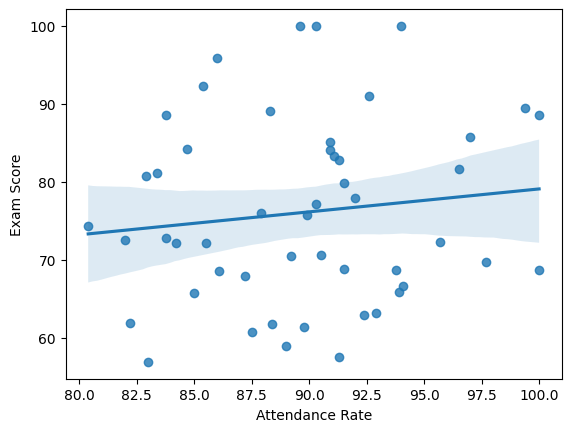

In [39]:
sns.regplot(x=df['Attendance Rate'],y=df['Exam Score'])
plt.show()

In [40]:
df.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
45,2.9,5.5,93.9,3.4,65.9
46,3.3,7.3,83.8,2.1,72.8
47,5.6,7.3,83.4,3.2,81.1
48,4.5,7.0,92.6,3.1,91.0
49,1.4,6.8,91.5,1.9,68.8


### Define Features and Target

In [41]:
##independent and dependent features
# X=df.iloc[:,:-1]
# y=df.iloc[:,-1]

x = df.drop('Exam Score',axis=1)
y = df['Exam Score']

#X = df[["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"]]
#y = df["Exam Score"]


In [42]:
x.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [43]:
y.head()

,Exam Score
0,80.7
1,76.0
2,89.1
3,95.9
4,70.5


### Train-Test Split

In [44]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

### Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

### Linear Regression Model

In [48]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [49]:
regression.fit(x_train,y_train)

LinearRegression()

In [50]:
y_pred = regression.predict(x_test)

In [51]:
y_test,y_pred

(35     69.7
 37     61.8
 41     81.7
 26     65.7
 38     66.6
 43     84.1
 3      95.9
 33     62.9
 30     61.9
 36     68.6
 14     59.0
 16     61.4
 20    100.0
 Name: Exam Score, dtype: float64,
 array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
         69.73079557,  80.76485587,  93.76445033,  65.93953528,
         64.58675718,  78.42296106,  56.67860558,  64.44046585,
        102.60438643]))

### Performance Metrics

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
#adjusted R-squared
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [60]:
print("mse",mse)
print("mae", mae)
print("rmse", rmse)
print("r2", r2)
print("adjusted_r2", adjusted_r2)

mse 14.600589378986257
mae 3.277026485962786
rmse 3.8210717578954543
r2 0.915670734577271
adjusted_r2 0.8735061018659065


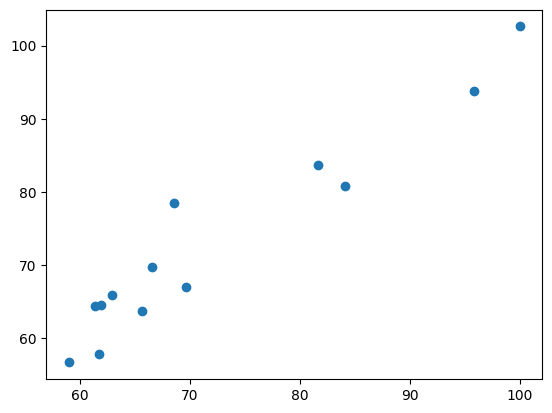

In [61]:
# Residual plot
plt.scatter(y_test,y_pred)
plt.show()

In [62]:
# Residual distribution
residuals=y_test-y_pred
print(residuals)

35    2.652956
37    3.894544
41   -1.930848
26    2.006006
38   -3.130796
43    3.335144
3     2.135550
33   -3.039535
30   -2.686757
36   -9.822961
14    2.321394
16   -3.040466
20   -2.604386
Name: Exam Score, dtype: float64


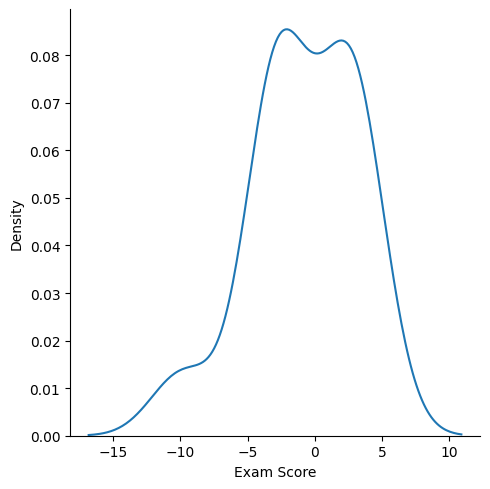

In [63]:
## if residuals are in normal distribution it seems good
sns.displot(residuals,kind='kde')
plt.show()

In [64]:
print("regression.intercept_",regression.intercept_)
print("regression.coef_",regression.coef_)



regression.intercept_ 77.41081081081082
regression.coef_ [ 9.28014703  1.78967062  3.24340001 -4.08127695]


###Predict New Students' Scores

In [67]:
new_student = [[5, 7, 90, 2]]  # 5 study hours, 7 sleep hours, %90 attendance, 2 social media hours
new_student_scaled = scaler.transform(new_student)
predicted_score = regression.predict(new_student_scaled)
predicted_score

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([90.88471349])

In [68]:
students = [
    [6, 8, 95, 5],
    [3, 6, 85, 4],
    [4, 7, 80, 3]
]
predicted_scores = regression.predict(scaler.transform(students))
print(predicted_scores)

[90.37189122 62.43586785 72.73292556]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
